In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('train_data.csv')

In [3]:
df.head()

,EVENT_MONTH,EVENT_DAY_OF_WEEK,EVENT_TIME,TRANSACTION_ID,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,USER_AGENT,...,COUNT_LOW_AMT_PAST_30DAY,COUNT_MANUAL_ENTRY_PAST_30DAY,COUNT_PHONE_ORDER_PAST_30DAY,COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY,COUNT_PLANNED_PAST_30DAY,COUNT_SWIPE_PAST_30DAY,COUNT_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY,PREV_M_INFLATION,PREV_M_UNEMP_RATE
0,2,4,14:16,a316accb,1.0,537.10,11.70,29200.0,1,NaN,...,16.0,39.0,73.0,60.0,13.0,22.0,4.0,14.0,1.1,5.7
1,2,4,12:51,8352728b,0.0,20371.88,96.35,30700.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,...,1.0,50.0,93.0,93.0,0.0,0.0,0.0,0.0,1.1,5.7
2,2,4,15:26,d50120e1,0.0,15628.17,193.72,19500.0,0,NaN,...,9.0,3.0,42.0,42.0,2.0,33.0,0.0,12.0,1.1,5.7
3,2,4,16:19,e96e2139,0.0,12913.98,47.15,18400.0,0,NaN,...,4.0,7.0,75.0,72.0,12.0,61.0,0.0,20.0,1.1,5.7
4,2,4,8:15:,32502a99,0.0,26779.35,121.88,29200.0,1,Mozilla/5.0 (iPhone; CPU OS 16_0 like Mac OS X...,...,11.0,6.0,41.0,42.0,10.0,30.0,4.0,16.0,1.1,5.7


In [4]:
df.isnull().sum()

EVENT_MONTH                                  0
EVENT_DAY_OF_WEEK                            0
EVENT_TIME                                   0
TRANSACTION_ID                               0
FRAUD_FLAG                                   0
                                            ..
COUNT_SWIPE_PAST_30DAY                       1
COUNT_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY    1
COUNT_WEEKEND_PAST_30DAY                     1
PREV_M_INFLATION                             1
PREV_M_UNEMP_RATE                            1
Length: 175, dtype: int64

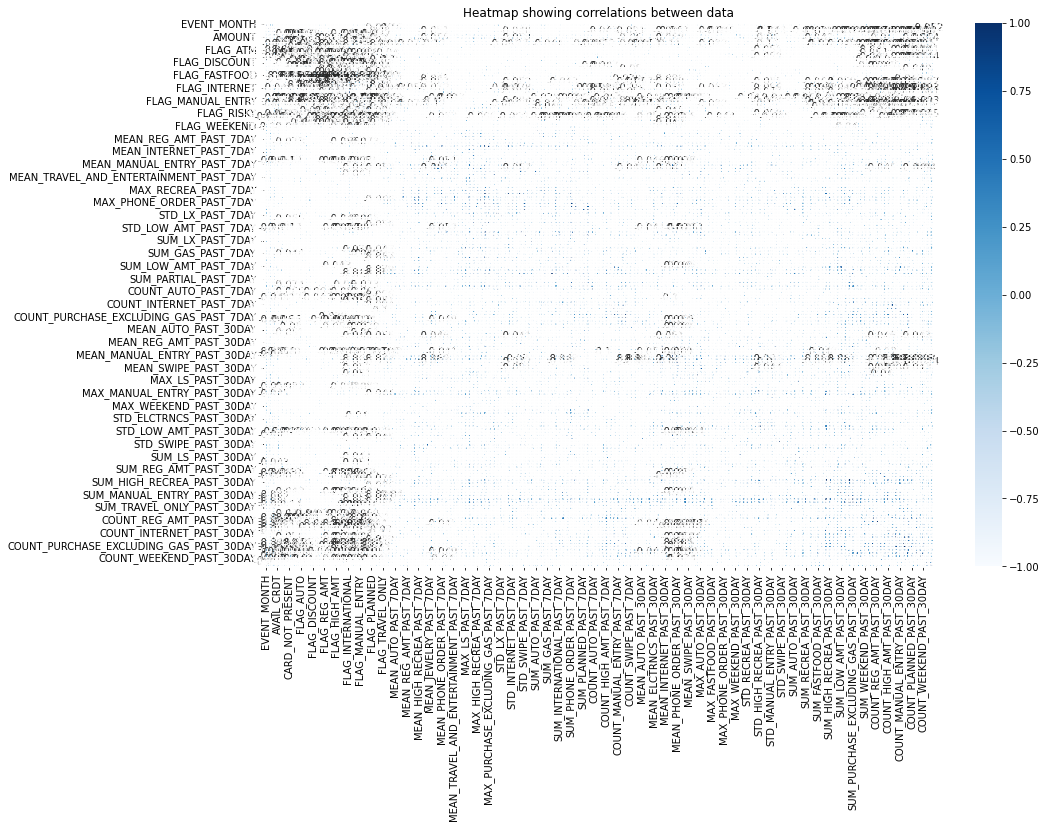

In [5]:
plt.figure(figsize=(15,10))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between data')
plt.show()

In [6]:
df.corr().unstack().sort_values(ascending = False)

EVENT_MONTH                  EVENT_MONTH                    1.000000
MAX_HIGH_RECREA_PAST_7DAY    MAX_HIGH_RECREA_PAST_7DAY      1.000000
STD_HIGH_AMT_PAST_7DAY       STD_HIGH_AMT_PAST_7DAY         1.000000
STD_FASTFOOD_PAST_7DAY       STD_FASTFOOD_PAST_7DAY         1.000000
STD_LX_PAST_7DAY             STD_LX_PAST_7DAY               1.000000
                                                              ...   
CARD_NOT_PRESENT             FLAG_SWIPE                    -0.991706
FLAG_PHONE_ORDER             FLAG_SWIPE                    -0.997825
FLAG_SWIPE                   FLAG_PHONE_ORDER              -0.997825
FLAG_GAS                     FLAG_PURCHASE_EXCLUDING_GAS   -1.000000
FLAG_PURCHASE_EXCLUDING_GAS  FLAG_GAS                      -1.000000
Length: 29241, dtype: float64

In [7]:
# rename FRAUD_FLAG to Target
df.rename(columns={'FRAUD_FLAG':'Target'}, inplace=True)

In [8]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.Target
y_val = df_val.Target
y_test = df_test.Target

del df_train['Target']
del df_val['Target']
del df_test['Target']

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

scores = []
depths = [10, 15, 20, 25, 50, 100]

for d in depths:
    dt = DecisionTreeClassifier(max_depth = d, random_state=1)
    dt.fit(df_train, y_train)
    y_pred = dt.predict(df_val)
    score = accuracy_score(y_val, y_pred) * 100
    scores.append((d,score))

ValueError: could not convert string to float: '20:49'

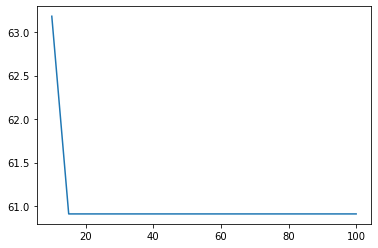

In [ ]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'accuracy'])
plt.plot(df_scores.max_depth, df_scores.accuracy)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
scores = []
ns = [10, 20, 30, 40, 50, 100]

for n in ns:
    rf = RandomForestClassifier(n_estimators = n, random_state = 1, n_jobs = -1)
    rf.fit(df_train, y_train)
    y_pred = rf.predict(df_val)
    score = accuracy_score(y_val, y_pred) * 100
    scores.append((n,score))

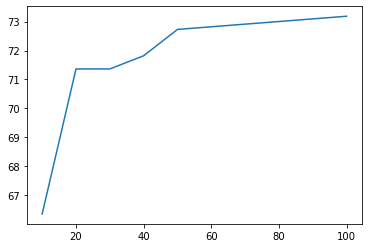

In [ ]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [ ]:
scores = []
depths = [10, 15, 20, 25, 50, 100]
n = 100

for d in depths:
    rf = RandomForestClassifier(n_estimators = n, max_depth = d, random_state = 1, n_jobs = -1)
    rf.fit(df_train, y_train)
    y_pred = rf.predict(df_val)
    score = accuracy_score(y_val, y_pred) * 100
    scores.append((d,score))

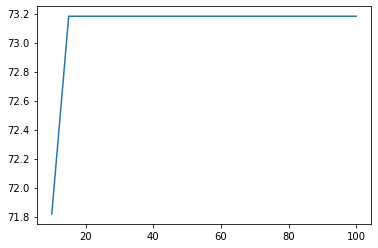

In [ ]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'rmse'])
plt.plot(df_scores.max_depth, df_scores.rmse)

In [ ]:
rf = RandomForestClassifier(n_estimators = 10, max_depth = 10, random_state = 1, n_jobs = -1)
rf.fit(df_train, y_train)
y_pred = rf.predict(df_test)
rfscore = accuracy_score(y_test, y_pred) * 100

In [ ]:
dt = DecisionTreeClassifier(max_depth = 10, random_state=1)
dt.fit(df_train, y_train)
y_pred = dt.predict(df_test)
dtscore = accuracy_score(y_test, y_pred) * 100

In [ ]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(df_train,y_train)
y_pred = xgb_cl.predict(df_val)
xgb_score = accuracy_score(y_val, y_pred)

In [ ]:
import lightgbm as lgb
lgb_cl = lgb.LGBMClassifier()
lgb_cl.fit(df_train,y_train)
y_pred = lgb_cl.predict(df_test)
lgb_score = accuracy_score(y_test, y_pred)

In [ ]:
[xgb_score, lgb_score, dtscore,rfscore]


[0.7, 0.7104072398190046, 66.51583710407239, 70.13574660633483]

In [ ]:
df_full = df.reset_index(drop=True)
y_full = df_full.Target

del df_full['Target']

In [ ]:
df_submission = pd.read_csv('test_data.csv')

In [ ]:
df_submission.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,44.0,13.0,6.6,2.5,5.6,45.3,0.4,1.3,32.7,1.1,1.7,65.3,0.8,0.6,1.4,1.1,0.7,0.2,1.0
1,51.0,9.1,2.7,1.0,2.7,39.0,0.1,0.3,23.5,0.6,0.8,69.8,0.3,0.7,1.0,0.9,0.6,0.1,0.7
2,51.0,15.1,5.7,2.2,5.2,41.2,0.3,0.8,32.5,1.1,1.6,69.1,0.4,1.3,1.7,2.1,0.7,0.0,1.4
3,15.0,7.9,1.9,0.7,2.5,27.0,0.0,0.0,0.0,0.5,0.8,66.7,0.5,1.1,1.5,0.5,0.1,0.1,1.0
4,36.0,14.4,5.8,2.3,5.4,43.1,0.0,0.1,50.0,1.1,1.4,82.0,1.1,1.4,2.4,0.9,0.3,0.2,0.9


In [ ]:
lgb_cl = lgb.LGBMClassifier()
lgb_cl.fit(df_full,y_full)
lgb_pred = lgb_cl.predict(df_submission)

In [ ]:
submission = pd.Series(lgb_pred, name='prediction')

In [ ]:
submission = pd.DataFrame({'prediction': submission})
submission.to_csv('lgb_submission.csv', index=False)

In [ ]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(df_full,y_full)
xgb_pred = xgb_cl.predict(df_submission)

In [ ]:
submission = pd.Series(xgb_pred, name='prediction')

In [ ]:
submission = pd.DataFrame({'prediction': submission})
submission.to_csv('xgb_submission.csv', index=False)

In [ ]:
rf = RandomForestClassifier(n_estimators = 10, max_depth = 10, random_state = 1, n_jobs = -1)
rf.fit(df_full,y_full)
rf_pred = rf.predict(df_submission)

In [ ]:
submission = pd.Series(rf_pred, name='prediction')

In [ ]:
submission = pd.DataFrame({'prediction': submission})
submission.to_csv('rf_submission.csv', index=False)

In [ ]:
dt = DecisionTreeClassifier(max_depth = 10, random_state=1)
dt.fit(df_full,y_full)
dt_pred = dt.predict(df_submission)

In [ ]:
submission = pd.Series(dt_pred, name='prediction')

In [ ]:
submission = pd.DataFrame({'prediction': submission})
submission.to_csv('dt_submission.csv', index=False)